# Introduction

In [1]:
from IPython.display import Markdown
Markdown("## 🔍 Renewable Energy in India: Dataset Exploration\n\nThis notebook provides an overview and basic analysis of renewable energy adoption across Indian states, including parameters like GSDP, population, and year-wise installations of various sources like Solar, Wind, and Biomass.")


## 🔍 Renewable Energy in India: Dataset Exploration

This notebook provides an overview and basic analysis of renewable energy adoption across Indian states, including parameters like GSDP, population, and year-wise installations of various sources like Solar, Wind, and Biomass.

## Imports and Visuals

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

## Loading Data

In [20]:
df = pd.read_csv("/Users/apple/Desktop/NLP Run/renewable_energy_dataset/data/renewable_energy_dataset.csv") #Attach the path of the csv file here.

## Quick Look

In [8]:
display(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

,State,Year,Installed - Bio-Mass Power,Installed - Small Hydro Power,Installed - Solar Power,Installed - Wind Power,Zone,Installed - Waste to Energy,Population,GSDP (crore INR)
0,Andaman And Nicobar Islands,2006,0.0,5.25,0.1,0.0,South,0.0,366589.0,3114.06
1,Andaman And Nicobar Islands,2007,0.0,5.25,0.1,1.1,South,0.0,369517.0,3114.06
2,Andaman And Nicobar Islands,2008,0.0,5.25,0.1,1.1,South,0.0,372344.0,3114.06
3,Andaman And Nicobar Islands,2009,0.0,5.25,0.1,0.0,South,0.0,375072.0,3114.06
4,Andaman And Nicobar Islands,2010,0.0,5.25,0.1,0.0,South,0.0,377699.0,3114.06



Dataset shape: (635, 10)

Columns: ['State', 'Year', 'Installed - Bio-Mass Power', 'Installed - Small Hydro Power', 'Installed - Solar Power', 'Installed - Wind Power', 'Zone', 'Installed - Waste to Energy', 'Population', 'GSDP (crore INR)']

Data types:
 State                             object
Year                               int64
Installed - Bio-Mass Power       float64
Installed - Small Hydro Power    float64
Installed - Solar Power          float64
Installed - Wind Power           float64
Zone                              object
Installed - Waste to Energy      float64
Population                       float64
GSDP (crore INR)                 float64
dtype: object


## Checking for missing values and basic stats

In [9]:
print("\nMissing values per column:\n", df.isnull().sum())

display(df.describe())


Missing values per column:
 State                            0
Year                             0
Installed - Bio-Mass Power       0
Installed - Small Hydro Power    0
Installed - Solar Power          0
Installed - Wind Power           0
Zone                             0
Installed - Waste to Energy      0
Population                       0
GSDP (crore INR)                 0
dtype: int64


,Year,Installed - Bio-Mass Power,Installed - Small Hydro Power,Installed - Solar Power,Installed - Wind Power,Installed - Waste to Energy,Population,GSDP (crore INR)
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,6.350000e+02,6.350000e+02
mean,2015.107087,187.231693,115.694174,734.535844,798.896088,3.669284,3.782743e+07,3.101186e+05
std,5.459157,459.446933,215.784754,2367.993674,1969.584494,12.392051,4.566577e+07,3.935173e+05
min,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.154400e+04,2.700000e+02
25%,2010.000000,0.000000,15.600000,0.025000,0.000000,0.000000,2.160036e+06,2.226550e+04
50%,2015.000000,0.720000,52.110000,5.610000,0.000000,0.000000,2.716620e+07,1.557090e+05
75%,2020.000000,136.634522,123.050000,193.360000,62.500000,0.000000,6.123900e+07,4.606255e+05
max,2024.000000,2643.190000,1280.730000,25471.720000,11722.720000,82.370000,2.380784e+08,2.043983e+06


## Total Installation by Source

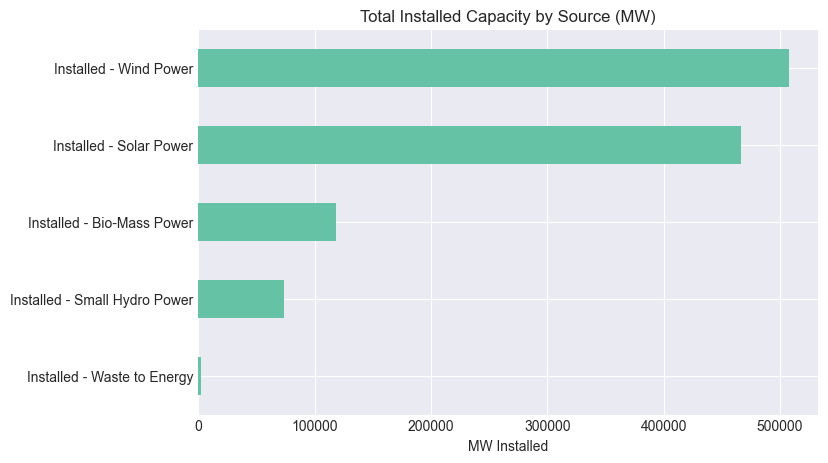

In [11]:
sources = ['Installed - Solar Power', 'Installed - Wind Power', 'Installed - Small Hydro Power', 'Installed - Bio-Mass Power', 'Installed - Waste to Energy']
df[sources].sum().sort_values().plot(kind='barh', figsize=(8,5), title="Total Installed Capacity by Source (MW)")
plt.xlabel("MW Installed")
plt.show()

## State Wise Total Installation

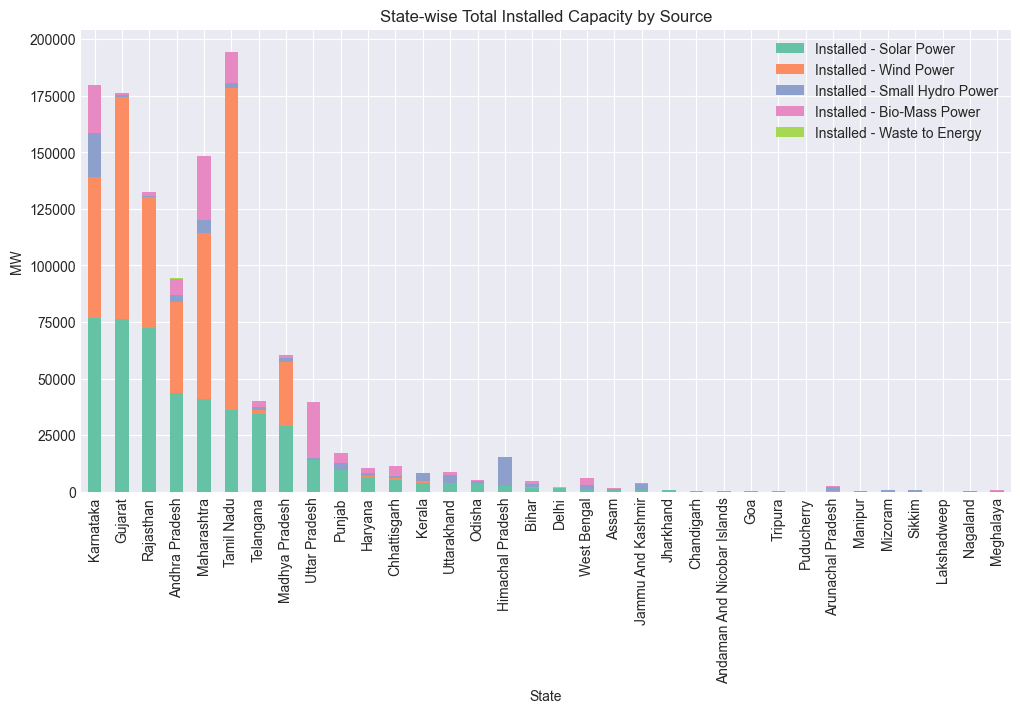

In [13]:
state_group = df.groupby("State")[sources].sum()
state_group.sort_values("Installed - Solar Power", ascending=False).plot(kind="bar", stacked=True, figsize=(12,6), title="State-wise Total Installed Capacity by Source")
plt.ylabel("MW")
plt.show()

## Trend Over Years

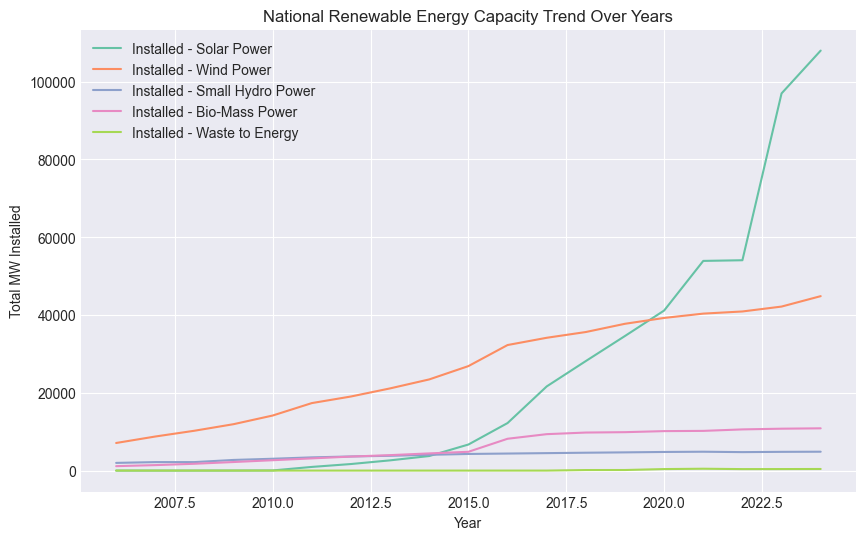

In [16]:
year_group = df.groupby("Year")[sources].sum()
year_group.plot(figsize=(10,6), title="National Renewable Energy Capacity Trend Over Years")
plt.ylabel("Total MW Installed")
plt.grid(True)
plt.show()

## Correlation Heatmap

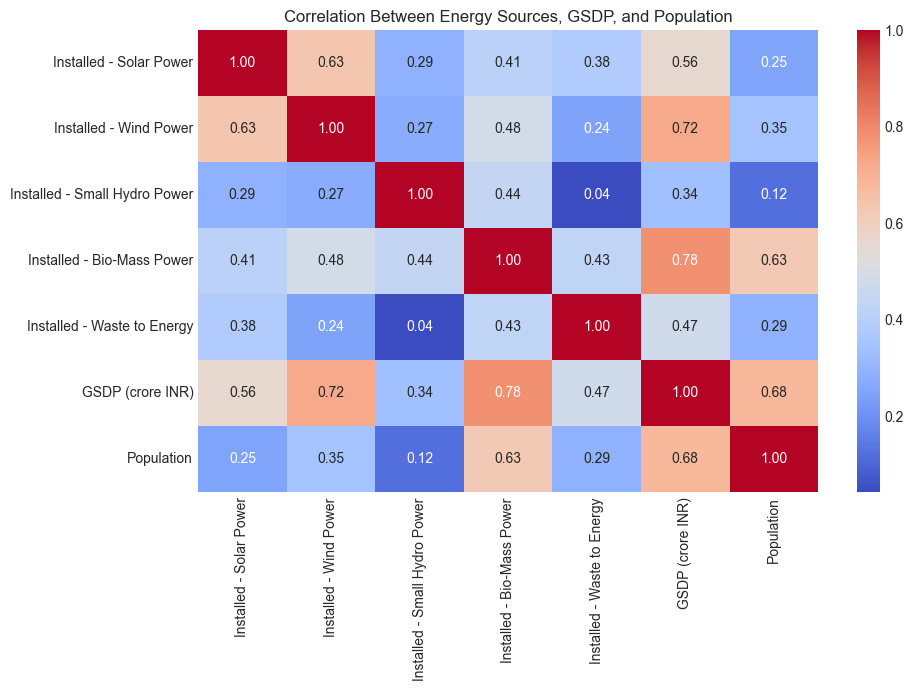

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[sources + ["GSDP (crore INR)", "Population"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Energy Sources, GSDP, and Population")
plt.show()